In [1]:
from src.integration import *
from src.model import *
import matplotlib.pyplot as plt
from src.neural_network import *

TensorFlow version: 2.9.1


Model: "grayboxann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 8)                 32        
                                                                 
 hiddenlayer2 (Dense)        (None, 8)                 72        
                                                                 
 outputlayer (Dense)         (None, 1)                 9         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-07-27 22:13:35.611191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


200/200 [==============================] - 1s 2ms/step - loss: 98.3551 - mse: 98.3551 - mae: 9.9153
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 79.0520 - mse: 79.0520 - mae: 8.8678
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 27.5273 - mse: 27.5273 - mae: 4.8871
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 2.7880 - mse: 2.7880 - mae: 1.4220
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 1.2651 - mse: 1.2651 - mae: 1.0110
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.6291 - mse: 0.6291 - mae: 0.7099
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2956 - mse: 0.2956 - mae: 0.4840
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1400 - mse: 0.1400 - mae: 0.3303
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0752 - mse: 0.0752 - mae: 0.2425
Epoch 10/100
200

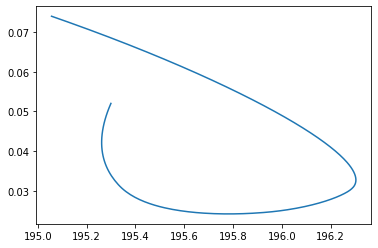

In [2]:
t_0 = 0
t_end = 20

beta=11.5
A=20
d=0.1
nu=1
b=0.022
mu0 = 10      
mu1 = 10.45
y0 = [195.3, 0.052, 4.4]

t = np.linspace(t_0, t_end, 300)

model = SIR(t_0, t_end, beta, A, d, nu, b, mu0, mu1)

ann = NeuralNetwork()
ann.import_data('data/NormalizedSimpleSIRData.csv')
ann.fit()
ann.model.evaluate(ann.x_test, ann.y_test, verbose=2)

S_norm = (y0[0]-194.612131) / (196.199362-194.612131)
I_norm = (y0[1]-0.030732) / (0.052602-0.030732)
R_norm = (y0[2]-3.433552) / (4.862474-3.433552)

mu = ann.model.predict(np.array([[S_norm, I_norm, R_norm]]))[0][0]


# The following line, which repredicts mu for every new step of S, I, and R, does not work.

s, i, r = classic_runge_kutta_ann(model.integration_model_ann, y0, t, ann)

# s, i, r = classic_runge_kutta_mu(model.integration_model_mu, y0, t, mu)

plt.plot(s, i);

In [4]:
mu

array([[10.363702]], dtype=float32)